# Entrainement du modèle d'identification du grade de la route

In [1]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

### 1. Chargement du dataframe contenant les données d'entrainement

In [2]:
# Téléchargement et extraction des fichiers

!wget -O DataFrameGlobal.zip -q http://62.210.208.36/DataFrameGlobal.zip
!unzip /content/DataFrameGlobal.zip

Archive:  /content/DataFrameGlobal.zip
  inflating: DataFrameGlobal.csv     


In [3]:
# Création du DataFrame
df = pd.read_csv("/content/DataFrameGlobal.csv")

In [4]:
df

,Temps (s),D_v4.4_p1.7,H_v2.4_p1.7,D_v3.8_p1.5,D_v5.0_p1.5,A_v1.9_p1.8,B_v3.3_p2.5,H_v5.1_p2.1,G_v3.0_p2.2,G_v5.3_p2.3,...,H_v2.4_p2.0,C_v3.0_p2.3,A_v3.1_p2.5,B_v4.7_p2.0,D_v3.3_p2.0,H_v5.4_p2.3,C_v2.3_p2.0,H_v1.4_p1.7,A_v4.8_p1.6,A_v3.4_p2.1
0,0.01,9.810000,9.81479,9.810000,9.810000,9.81,9.810000,9.819580,9.814790,9.81479,...,9.81479,9.810000,9.81,9.81000,9.810000,9.829160,9.81,9.81000,9.81,9.81000
1,0.02,9.810000,9.81479,9.810000,9.810000,9.81,9.810000,9.819580,9.814790,9.81479,...,9.81479,9.810000,9.81,9.81000,9.810000,9.829160,9.81,9.81000,9.81,9.81000
2,0.03,9.810000,9.81479,9.810000,9.810000,9.81,9.810000,9.819580,9.814790,9.81479,...,9.81479,9.810000,9.81,9.81000,9.810000,9.829160,9.81,9.81000,9.81,9.81000
3,0.04,9.810000,9.81479,9.810000,9.810000,9.81,9.810000,9.819580,9.814790,9.81479,...,9.81479,9.810000,9.81,9.81000,9.810000,9.829160,9.81,9.81000,9.81,9.81000
4,0.05,9.810000,9.81479,9.810000,9.810000,9.81,9.810000,9.819580,9.814790,9.81479,...,9.81479,9.810000,9.81,9.81000,9.810000,9.829160,9.81,9.81000,9.81,9.81000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,59.96,9.810000,9.77647,9.810000,9.805210,9.81,9.517808,9.805210,19.140996,9.81958,...,9.77647,10.394385,9.81,9.81000,7.999365,9.695039,9.81,9.81479,9.81,9.81958
5996,59.97,9.810000,9.77647,10.284214,9.805210,9.81,9.781260,9.805210,9.781260,9.81958,...,9.77647,9.810000,9.81,9.81000,9.647139,9.695039,9.81,9.81479,9.81,9.86269
5997,59.98,9.810000,9.77647,9.934541,9.805210,9.81,9.810000,9.805210,9.776470,9.81958,...,9.77647,9.810000,9.81,9.81000,9.810000,9.695039,9.81,9.81479,9.81,9.81000
5998,59.99,17.277671,9.77647,9.805210,9.805210,9.81,9.810000,9.805210,9.776470,9.81958,...,9.77647,9.810000,9.81,9.81000,9.810000,9.695039,9.81,9.81479,9.81,9.81000


Normalisation des données :

In [ ]:
from sklearn import preprocessing

x = df.iloc[:,1:].values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
#df.iloc[:,1:] = pd.DataFrame(x_scaled)

In [5]:
df

,Temps (s),D_v4.4_p1.7,H_v2.4_p1.7,D_v3.8_p1.5,D_v5.0_p1.5,A_v1.9_p1.8,B_v3.3_p2.5,H_v5.1_p2.1,G_v3.0_p2.2,G_v5.3_p2.3,...,H_v2.4_p2.0,C_v3.0_p2.3,A_v3.1_p2.5,B_v4.7_p2.0,D_v3.3_p2.0,H_v5.4_p2.3,C_v2.3_p2.0,H_v1.4_p1.7,A_v4.8_p1.6,A_v3.4_p2.1
0,0.01,9.810000,9.81479,9.810000,9.810000,9.81,9.810000,9.819580,9.814790,9.81479,...,9.81479,9.810000,9.81,9.81000,9.810000,9.829160,9.81,9.81000,9.81,9.81000
1,0.02,9.810000,9.81479,9.810000,9.810000,9.81,9.810000,9.819580,9.814790,9.81479,...,9.81479,9.810000,9.81,9.81000,9.810000,9.829160,9.81,9.81000,9.81,9.81000
2,0.03,9.810000,9.81479,9.810000,9.810000,9.81,9.810000,9.819580,9.814790,9.81479,...,9.81479,9.810000,9.81,9.81000,9.810000,9.829160,9.81,9.81000,9.81,9.81000
3,0.04,9.810000,9.81479,9.810000,9.810000,9.81,9.810000,9.819580,9.814790,9.81479,...,9.81479,9.810000,9.81,9.81000,9.810000,9.829160,9.81,9.81000,9.81,9.81000
4,0.05,9.810000,9.81479,9.810000,9.810000,9.81,9.810000,9.819580,9.814790,9.81479,...,9.81479,9.810000,9.81,9.81000,9.810000,9.829160,9.81,9.81000,9.81,9.81000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,59.96,9.810000,9.77647,9.810000,9.805210,9.81,9.517808,9.805210,19.140996,9.81958,...,9.77647,10.394385,9.81,9.81000,7.999365,9.695039,9.81,9.81479,9.81,9.81958
5996,59.97,9.810000,9.77647,10.284214,9.805210,9.81,9.781260,9.805210,9.781260,9.81958,...,9.77647,9.810000,9.81,9.81000,9.647139,9.695039,9.81,9.81479,9.81,9.86269
5997,59.98,9.810000,9.77647,9.934541,9.805210,9.81,9.810000,9.805210,9.776470,9.81958,...,9.77647,9.810000,9.81,9.81000,9.810000,9.695039,9.81,9.81479,9.81,9.81000
5998,59.99,17.277671,9.77647,9.805210,9.805210,9.81,9.810000,9.805210,9.776470,9.81958,...,9.77647,9.810000,9.81,9.81000,9.810000,9.695039,9.81,9.81479,9.81,9.81000


Affichage de quelques séries :

In [6]:
import plotly.graph_objects as go

fig = go.Figure()

fig.add_trace(go.Scatter(x=np.linspace(0,len(df),len(df)+1),y=df[df.columns[1]], line=dict(color='blue', width=1),name=df.columns[1]))
fig.add_trace(go.Scatter(x=np.linspace(0,len(df),len(df)+1),y=df[df.columns[2]], line=dict(color='red', width=1),name=df.columns[2]))
fig.add_trace(go.Scatter(x=np.linspace(0,len(df),len(df)+1),y=df[df.columns[3]], line=dict(color='black', width=1),name=df.columns[3]))

fig.update_xaxes(rangeslider_visible=True)
yaxis=dict(autorange = True,fixedrange= False)
fig.update_yaxes(yaxis)
fig.show()

### 2. Création du dataset d'entrainement et de test

**2.1. Création des datasets global (avec les données d'entrainement et de test)**

Le dataset d'entrainement contient des milliers de séquences de 30 secondes, chacune étant identifiée comme appartenant à un grade spécifique de la route (A,B,C,D,E,F,G ou H) : 

<center><img src="https://github.com/AlexandreBourrieau/FICHIERS/blob/main/VibrationRoute/Extraction10s.jpg?raw=true" width=800></center>

<center><img src="https://github.com/AlexandreBourrieau/FICHIERS/raw/main/VibrationRoute/GradesRoutes.jpg" width=600></center>

Pour coder les labels, on utilise le format one_hot avec la fonction [to_categorical](https://www.tensorflow.org/api_docs/python/tf/keras/utils/to_categorical):

In [7]:
from keras.utils import to_categorical

grades = [0,1,2,3,4,5,6,7]

codes_one_hot = to_categorical(grades)
print(codes_one_hot)

[[1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1.]]


La structure du dataset est la suivante :

<center><img src="https://github.com/AlexandreBourrieau/FICHIERS/blob/main/VibrationRoute/ContenuDataset4.png?raw=true" width=1024></center>

In [8]:
# Extraction des quantités annexes à partir des données d'accélération
def get_annexes(serie):
  # Variance
  variance = tf.math.reduce_variance(serie)
  # Ecart type
  std = tf.math.reduce_std(serie)
  # max
  max = tf.math.reduce_max(serie)
  # min
  min = tf.math.reduce_min(serie)

  return tf.convert_to_tensor([variance, std, max, min], dtype=tf.float32)

In [9]:
# Fonction permettant de créer un dataset à partir des données de la série temporelle
# au format X(X1,X2,...X300), Y, Z
# X sont les échantillons aux pas de 0.1s (100 échantillons = 10 secondes)
# Y sont les entrées annexes (vitesse et quantités extraites des données d'accélération)
# Z sont les labels (grades de la route) au format one_hot : A=0, B=1, ..., H=7

def prepare_dataset_XY(serie, label, vitesse, taille_fenetre, buffer_melange):
  dataset = tf.data.Dataset.from_tensor_slices(serie)
  dataset = dataset.window(taille_fenetre, shift=taille_fenetre, drop_remainder=True)
  dataset = dataset.flat_map(lambda x: x.batch(taille_fenetre))
#  dataset = dataset.map(lambda x: (x, tf.concat([vitesse,get_annexes(x)],0), codes_one_hot[label]))
  dataset = dataset.map(lambda x: (x/tf.math.reduce_mean(x), tf.concat([vitesse,get_annexes(x)],0), codes_one_hot[label]))
  return dataset

In [10]:
def get_label(grade_route):
    if grade_route == 'A':
      label = 0
    elif grade_route == 'B':
      label = 1
    elif grade_route == 'C':
      label = 2
    elif grade_route == 'D':
      label = 3
    elif grade_route == 'E':
      label = 4
    elif grade_route == 'F':
      label = 5
    elif grade_route == 'G':
      label = 6
    elif grade_route == 'H':
      label = 7
    return tf.convert_to_tensor(label)

In [11]:
taille_fenetre = 100*10
batch_size = 128
ratio_entrainement = 0.8

# Création du dataset initial
serie = df[df.columns[1]].values

grade_route = df.columns[1].split("_")[0]
vitesse = tf.convert_to_tensor([float(df.columns[1].split("_")[1].split("v")[1])])
label = get_label(grade_route)
dataset = prepare_dataset_XY(serie,label,vitesse, taille_fenetre,10000)

# Concaténation avec les datasets suivants
from tqdm import tqdm
for i in tqdm(range(len(df.columns))):
  colonne = df.columns[i]
  if i > 1:
    # Extraction des labels
    grade_route = colonne.split("_")[0]
    vitesse = tf.convert_to_tensor([float(colonne.split("_")[1].split("v")[1])])
    label = get_label(grade_route)
    
    # Création de la série
    serie = df[colonne].values

    # Création du dataset
    dataset_ = prepare_dataset_XY(serie,label,vitesse,taille_fenetre,10000)
    dataset = dataset.concatenate(dataset_)

# Création des batchs
dataset = dataset.batch(batch_size,drop_remainder=True)

100%|██████████| 2753/2753 [02:24<00:00, 19.05it/s]


**2.2. Séparation des données d'entrainement et de tests**

Format des dataset : [(serie,annexes,label), ...]

In [12]:
ratio_entrainement = 0.8
dataset_ent, dataset_test = tf.keras.utils.split_dataset(dataset, left_size=ratio_entrainement)

**2.3. Réorganisation des datasets**

Format final des dataset : [((serie,annexes),label), ...]

In [13]:
dataset_ent = dataset_ent.map(lambda x,y,z : ((x,y),z))
dataset_test = dataset_test.map(lambda x,y,z : ((x,y),z))

In [ ]:
i = 0
for element in dataset_ent:
  i=i+1
  if i > 1:
    break
  print(element)

### 3. Mise en place du modèle

Principe de l'utilisation des réseaux de convolution sur la série temporelle :

<center><img src="https://github.com/AlexandreBourrieau/FICHIERS/blob/main/VibrationRoute/schema_base.png?raw=true" width=600></center>

**3.1. Création du modèle à base de réseaux de convolution**

<center><img src="https://github.com/AlexandreBourrieau/FICHIERS/blob/main/VibrationRoute/structure_reseau.png?raw=true" width=600></center>

In [35]:
from keras.layers.merging.concatenate import concatenate

entree_serie = tf.keras.layers.Input(shape=(taille_fenetre), name="First")
entree_annexes = tf.keras.layers.Input(shape=(5), name="Second")

# Réseau de convolution
conv1 = keras.layers.Conv1D(filters=8, kernel_size=7, padding="same")(tf.expand_dims(entree_serie,axis=-1))
conv1 = keras.layers.BatchNormalization()(conv1)
conv1 = keras.layers.ReLU()(conv1)
conv1 = keras.layers.Dropout(0.2)(conv1)
conv1 = keras.layers.MaxPool1D()(conv1)

conv2 = keras.layers.Conv1D(filters=8, kernel_size=4, padding="same")(conv1)
conv2 = keras.layers.BatchNormalization()(conv2)
conv2 = keras.layers.ReLU()(conv2)
conv2 = keras.layers.Dropout(0.2)(conv2)

conv3 = keras.layers.Conv1D(filters=8, kernel_size=3, padding="same")(conv2)
conv3 = keras.layers.BatchNormalization()(conv3)

conv4 = keras.layers.Add()([conv1,conv3])
conv4 = keras.layers.ReLU()(conv4)
conv4 = keras.layers.Dropout(0.1)(conv4)
conv4 = keras.layers.MaxPool1D()(conv4)
conv4 = keras.layers.Flatten()(conv4)

# Prise en compte des entrées annexes
concat = keras.layers.concatenate([conv4,entree_annexes])

# Construction du modèle
output_layer = keras.layers.Dense(8, activation="softmax")(concat)


model = tf.keras.Model(inputs=[entree_serie,entree_annexes],outputs=output_layer)
model.summary()

Model: "model_8"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 First (InputLayer)             [(None, 1000)]       0           []                               
                                                                                                  
 tf.expand_dims_8 (TFOpLambda)  (None, 1000, 1)      0           ['First[0][0]']                  
                                                                                                  
 conv1d_24 (Conv1D)             (None, 1000, 8)      64          ['tf.expand_dims_8[0][0]']       
                                                                                                  
 batch_normalization_24 (BatchN  (None, 1000, 8)     32          ['conv1d_24[0][0]']              
 ormalization)                                                                              

**3.2. Définition de l'optimiseur et de la fonction d'erreur**

On utilise l'optimiseur Adam ainsi qu'une fonction d'erreur de type [CategoricalCrossentropy](https://keras.io/api/losses/probabilistic_losses/#categoricalcrossentropy-class).

L'ensemble des fonctions d'erreur utilisables avec Keras se trouve ici : https://keras.io/api/losses/

La fonction d'erreur que nous utilisons permet de gérer les labels multiples qui ont été codés en représentation "one_hot".

In [36]:
# Définition de l'optimiseur à utiliser
optimiseur=tf.keras.optimizers.Adam(learning_rate=1e-3)

# Compile le modèle
model.compile(loss="categorical_crossentropy", optimizer=optimiseur, metrics=['accuracy'])

**3.3. Entrainement du modèle**

In [37]:
historique = model.fit(dataset_ent, validation_data = dataset_test, epochs=100, batch_size=batch_size)

Epoch 1/100
104/104 [==============================] - 14s 111ms/step - loss: 2.0082 - accuracy: 0.3285 - val_loss: 2.0493 - val_accuracy: 0.1239
Epoch 2/100
104/104 [==============================] - 12s 116ms/step - loss: 1.4502 - accuracy: 0.4366 - val_loss: 1.5925 - val_accuracy: 0.4503
Epoch 3/100
104/104 [==============================] - 12s 116ms/step - loss: 1.2878 - accuracy: 0.4845 - val_loss: 1.6261 - val_accuracy: 0.3395
Epoch 4/100
104/104 [==============================] - 11s 110ms/step - loss: 1.1925 - accuracy: 0.5212 - val_loss: 1.3387 - val_accuracy: 0.4661
Epoch 5/100
104/104 [==============================] - 12s 116ms/step - loss: 1.1433 - accuracy: 0.5497 - val_loss: 1.3936 - val_accuracy: 0.4291
Epoch 6/100
104/104 [==============================] - 11s 109ms/step - loss: 1.1625 - accuracy: 0.5517 - val_loss: 1.1757 - val_accuracy: 0.5651
Epoch 7/100
104/104 [==============================] - 12s 115ms/step - loss: 1.0905 - accuracy: 0.5803 - val_loss: 1.1757 -

Text(0.5, 1.0, 'Evolution de la précision en fonction de la période')

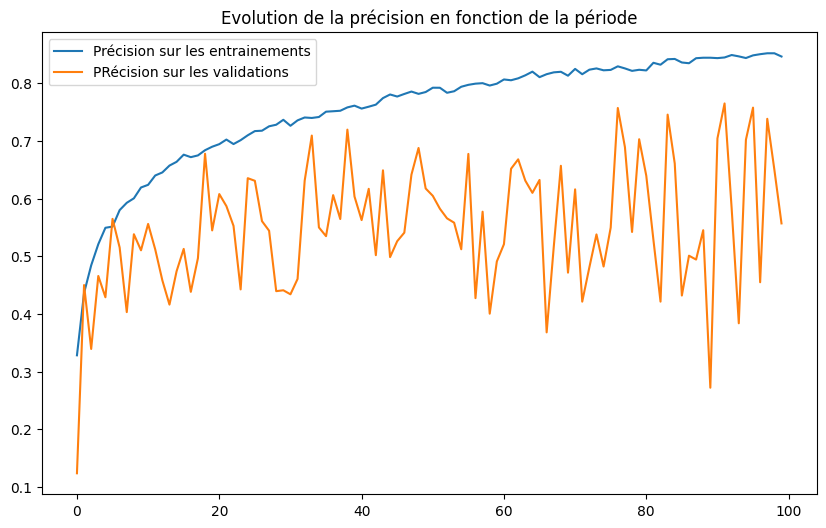

In [38]:
erreur_entrainement = historique.history["accuracy"]
erreur_validation = historique.history["val_accuracy"]

# Affiche l'erreur en fonction de la période
plt.figure(figsize=(10, 6))
plt.plot(np.arange(0,len(erreur_entrainement)),erreur_entrainement, label="Précision sur les entrainements")
plt.plot(np.arange(0,len(erreur_entrainement)),erreur_validation, label ="PRécision sur les validations")
plt.legend()

plt.title("Evolution de la précision en fonction de la période")

**3.4. Évaluation du modèle**

In [39]:
model.evaluate(dataset_test)

26/26 [==============================] - 1s 27ms/step - loss: 1.0872 - accuracy: 0.5572


[1.0872164964675903, 0.5572380423545837]

### 4. Sauvegarde du modèle au format ONNX